<a href="https://colab.research.google.com/github/vedikakapoor-11/SKILL/blob/main/skill1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = pd.read_csv('/content/Diabetes (1).csv')
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Experiment -1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the original dataset
df = pd.read_csv("Diabetes (1).csv")

print("Initial Dataset Info:")
print(df.info())

# Remove duplicates
df = df.drop_duplicates()

# Remove rows with null values
df = df.dropna()

# Handling missing values
df.fillna(df.mean(numeric_only=True).to_dict(), inplace=True)

# Convert to appropriate data types
df = df.apply(pd.to_numeric, errors='ignore')

# Display cleaned dataset info
print("\nCleaned Dataset Info:")
print(df.info())
print("\nFirst few rows of cleaned data:")
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      7

<ipython-input-5-fa87805ef5cd>:23: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


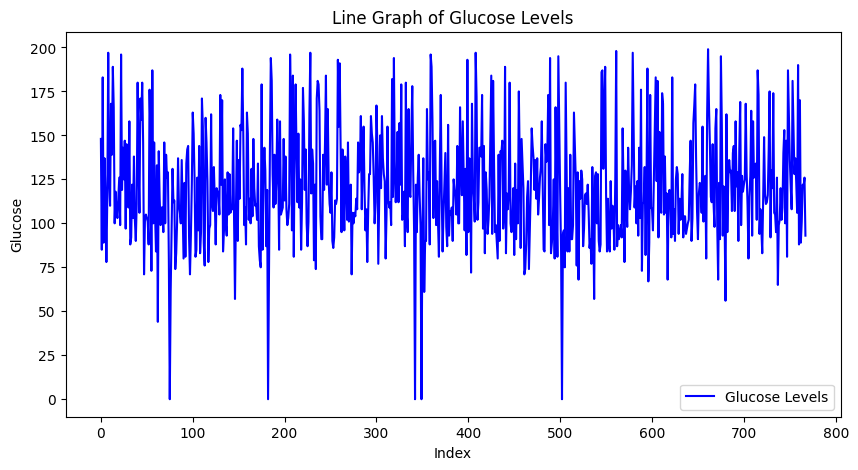

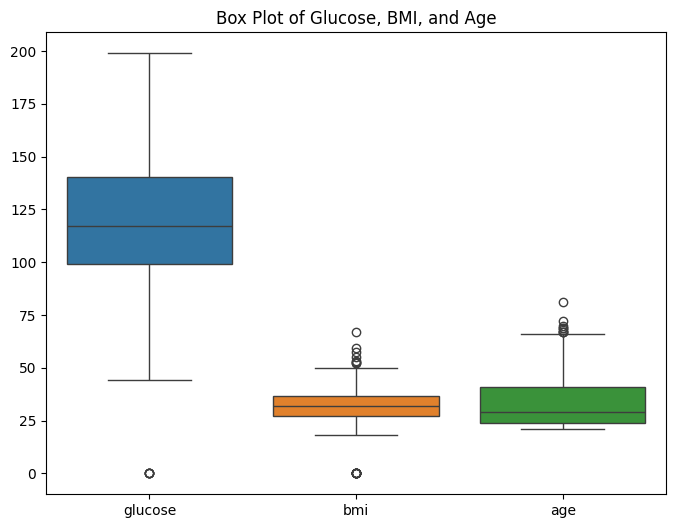

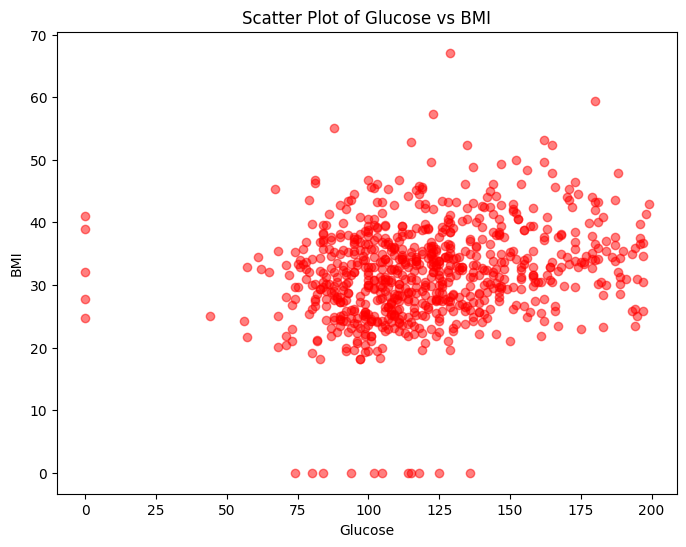

In [ ]:
#experiment 5 and 6
# Line Graph of Glucose Levels
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['glucose'], label='Glucose Levels', color='blue')
plt.xlabel('Index')
plt.ylabel('Glucose')
plt.title('Line Graph of Glucose Levels')
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['glucose', 'bmi', 'age']])
plt.title('Box Plot of Glucose, BMI, and Age')
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['glucose'], df['bmi'], alpha=0.5, color='red')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI')
plt.show()


Outliers removed using IQR.

Dataset Info After Outlier Removal using IQR:
<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  639 non-null    int64  
 1   glucose      639 non-null    int64  
 2   diastolic    639 non-null    int64  
 3   triceps      639 non-null    int64  
 4   insulin      639 non-null    int64  
 5   bmi          639 non-null    float64
 6   dpf          639 non-null    float64
 7   age          639 non-null    int64  
 8   diabetes     639 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.9 KB
None


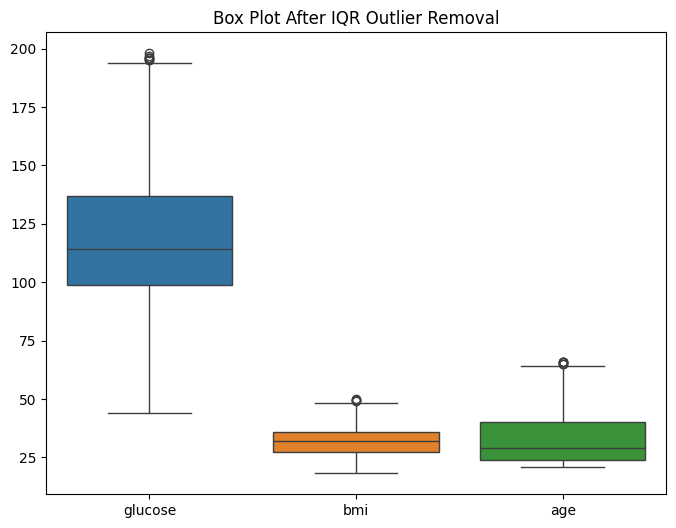


Outliers removed using Z-Score.

Dataset Info After Z-Score Outlier Removal:
<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  629 non-null    int64  
 1   glucose      629 non-null    int64  
 2   diastolic    629 non-null    int64  
 3   triceps      629 non-null    int64  
 4   insulin      629 non-null    int64  
 5   bmi          629 non-null    float64
 6   dpf          629 non-null    float64
 7   age          629 non-null    int64  
 8   diabetes     629 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.1 KB
None


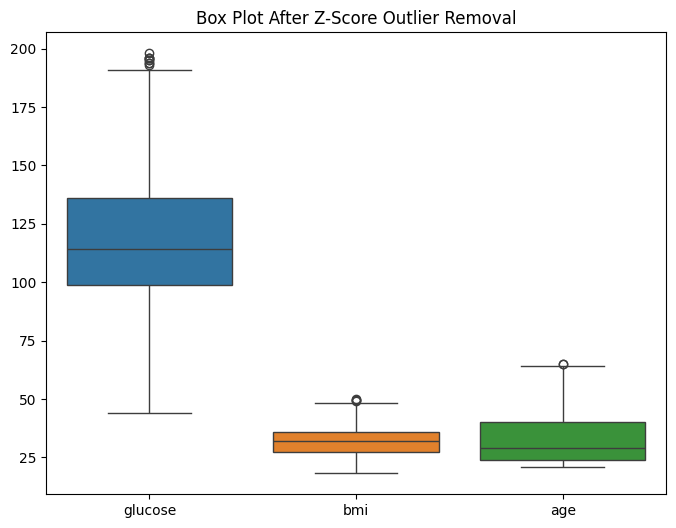

In [ ]:
# Removing Outliers Using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nOutliers removed using IQR.")
print("\nDataset Info After Outlier Removal using IQR:")
print(df.info())

# Box Plot After IQR Outlier Removal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['glucose', 'bmi', 'age']])
plt.title('Box Plot After IQR Outlier Removal')
plt.show()

# Removing Outliers Using Z-Score
z_scores = stats.zscore(df.select_dtypes(include=['number']))
abs_z_scores = abs(z_scores)
df = df[(abs_z_scores < 3).all(axis=1)]

print("\nOutliers removed using Z-Score.")
print("\nDataset Info After Z-Score Outlier Removal:")
print(df.info())

# Box Plot After Z-Score Outlier Removal
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['glucose', 'bmi', 'age']])
plt.title('Box Plot After Z-Score Outlier Removal')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMax Scaling
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

print("\nDataset after MinMax Normalization:")
print(df.head())

# Standard Scaling
scaler_std = StandardScaler()
df[numeric_columns] = scaler_std.fit_transform(df[numeric_columns])

print("\nDataset after Standard Scaling:")
print(df.head())


Dataset after MinMax Normalization:
   pregnancies   glucose  diastolic   triceps   insulin       bmi       dpf  \
0     0.461538  0.675325   0.451613  0.583333  0.000000  0.484277  0.500912   
1     0.076923  0.266234   0.354839  0.483333  0.000000  0.264151  0.249088   
2     0.615385  0.902597   0.322581  0.000000  0.000000  0.160377  0.541971   
3     0.076923  0.292208   0.354839  0.383333  0.309211  0.311321  0.081204   
5     0.384615  0.467532   0.483871  0.000000  0.000000  0.232704  0.112226   

        age  diabetes  
0  0.659091       1.0  
1  0.227273       0.0  
2  0.250000       1.0  
3  0.000000       0.0  
5  0.204545       0.0  

Dataset after Standard Scaling:
   pregnancies   glucose  diastolic   triceps   insulin       bmi       dpf  \
0     0.676781  1.018382  -0.005796  0.931472 -0.834610  0.244740  0.824116   
1    -0.854497 -1.163464  -0.539342  0.539612 -0.834610 -0.841540 -0.302702   
2     1.289292  2.230518  -0.717191 -1.354378 -0.834610 -1.353644  1.00783

In [ ]:
#encoding
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print("\nCategorical columns encoded successfully.")
print("\nDataset Info After Encoding:")
print(df.info())

# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

print("\nCategorical columns encoded using One-Hot Encoding successfully.")
print("\nDataset Info After One-Hot Encoding:")
print(df.info())


Categorical columns encoded successfully.

Dataset Info After Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  629 non-null    int64  
 1   glucose      629 non-null    int64  
 2   diastolic    629 non-null    int64  
 3   triceps      629 non-null    int64  
 4   insulin      629 non-null    int64  
 5   bmi          629 non-null    float64
 6   dpf          629 non-null    float64
 7   age          629 non-null    int64  
 8   diabetes     629 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.1 KB
None

Categorical columns encoded using One-Hot Encoding successfully.

Dataset Info After One-Hot Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  629 n

FEATURE SELECTION METHODS :-(filter methods)


> Add blockquote




Pearson's Correlation Matrix:
             pregnancies   glucose  diastolic   triceps   insulin       bmi  \
pregnancies     1.000000  0.134063   0.207114 -0.091060 -0.111792  0.039730   
glucose         0.134063  1.000000   0.231987  0.011730  0.257828  0.197782   
diastolic       0.207114  0.231987   1.000000  0.047585 -0.035142  0.300162   
triceps        -0.091060  0.011730   0.047585  1.000000  0.487681  0.390624   
insulin        -0.111792  0.257828  -0.035142  0.487681  1.000000  0.184566   
bmi             0.039730  0.197782   0.300162  0.390624  0.184566  1.000000   
dpf             0.002015  0.045560   0.012239  0.164942  0.219478  0.145737   
age             0.576659  0.273286   0.343243 -0.124106 -0.072747  0.072077   
diabetes        0.224249  0.486959   0.179794  0.039094  0.100840  0.273752   

                  dpf       age  diabetes  
pregnancies  0.002015  0.576659  0.224249  
glucose      0.045560  0.273286  0.486959  
diastolic    0.012239  0.343243  0.179794  
tr

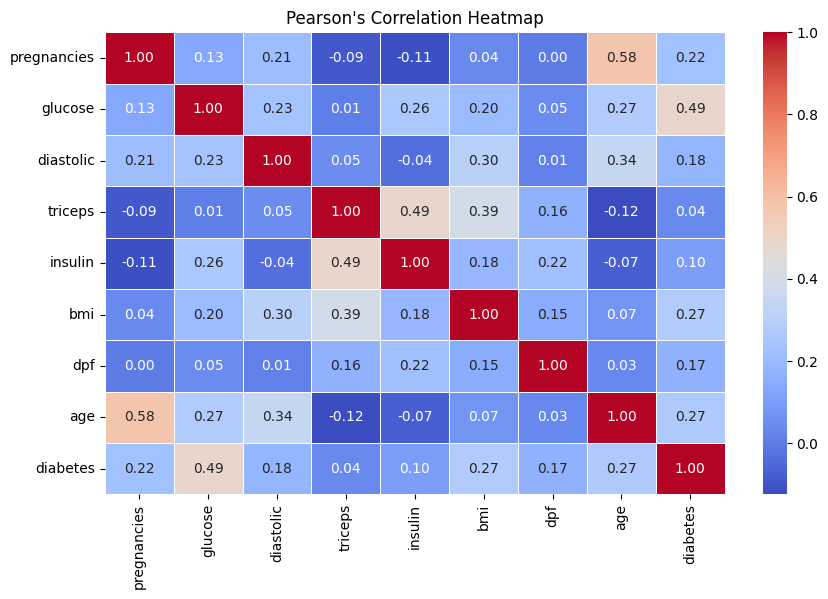

In [ ]:
# Pearson's Correlation Test
correlation_matrix = df.corr(method='pearson')  # compute all columns
print("\nPearson's Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson's Correlation Heatmap")
plt.show()


ANOVA Test Results:
F-statistic: 24.4112
P-value: 0.0000
There is a significant difference in glucose levels among age groups.
age_group
Young         -0.339894
Middle-aged    0.071032
Elder          0.305819
Name: glucose, dtype: float64


<ipython-input-13-7f9e2a1010dc>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['glucose'].mean())


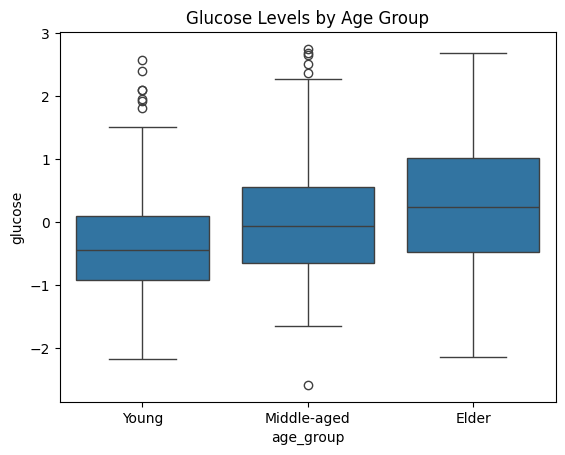

In [ ]:
from scipy.stats import f_oneway

# Convert age into categorical groups
df['age_group'] = pd.qcut(df['age'], q=3, labels=['Young', 'Middle-aged', 'Elder'])

# Filtering groups
group1 = df[df['age_group'] == 'Young']['glucose']
group2 = df[df['age_group'] == 'Middle-aged']['glucose']
group3 = df[df['age_group'] == 'Elder']['glucose']

anova_stat, p_value = f_oneway(group1, group2, group3)
print("\nANOVA Test Results:")
print(f"F-statistic: {anova_stat:.4f}")  # The F-statistic measures how much a feature impacts the target variable
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There is a significant difference in glucose levels among age groups.")
else:
    print("No significant difference found in glucose levels among age groups.")

# Display group means
print(df.groupby('age_group')['glucose'].mean())

# Boxplot
sns.boxplot(x='age_group', y='glucose', data=df)
plt.title('Glucose Levels by Age Group')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Chi-Square Feature Selection
X = df.drop(columns=['glucose'])  # Features
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])  # target variable

X_numeric = X.select_dtypes(include=['number'])  # only numeric
X_numeric = X_numeric.abs().astype(int)

selector = SelectKBest(score_func=chi2, k='all')
X_selected = selector.fit_transform(X_numeric, y)

feature_scores = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Chi-Square Score': selector.scores_
})
# highest to low chi-square scores
sorted_features = feature_scores.sort_values(by='Chi-Square Score', ascending=False)

print("\nFeature Importance based on Chi-Square Test:")
print(sorted_features)


Feature Importance based on Chi-Square Test:
       Feature  Chi-Square Score
7     diabetes         59.327425
3      insulin         51.269513
6          age          6.800897
2      triceps          4.262138
1    diastolic          3.157210
0  pregnancies          1.844834
4          bmi          1.003521
5          dpf          0.257726



Feature Importance using Information Gain:
       Feature  Information Gain
6          age          0.050053
7     diabetes          0.042575
2      triceps          0.034764
3      insulin          0.023898
5          dpf          0.019318
4          bmi          0.009490
0  pregnancies          0.000000
1    diastolic          0.000000


<ipython-input-15-09a142c691c7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=info_gain_df['Information Gain'], y=info_gain_df['Feature'], palette='viridis')


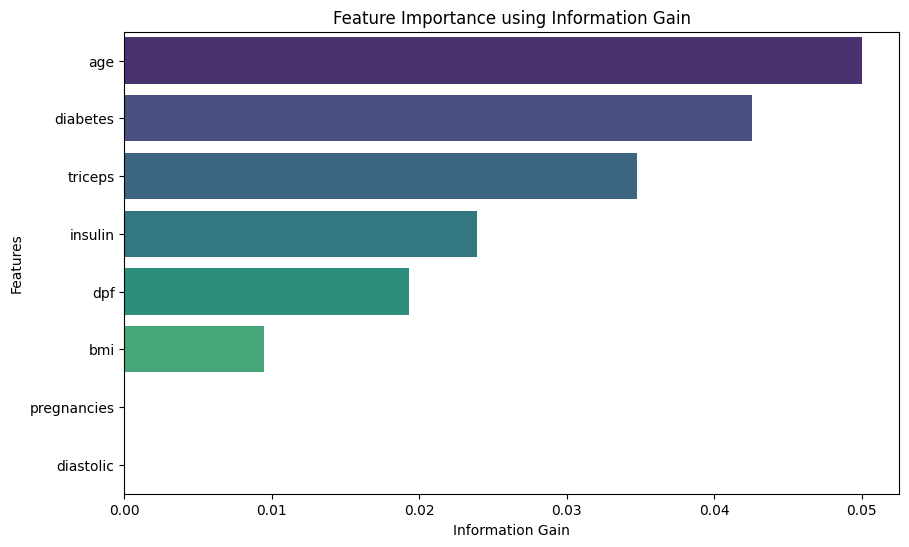

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Information Gain Feature Selection
X = df.drop(columns=['glucose'])  # Features
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])

X_numeric = X.select_dtypes(include=['number'])
X_numeric = X_numeric.abs().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

info_gain = mutual_info_classif(X_train, y_train)

info_gain_df = pd.DataFrame({'Feature': X_numeric.columns, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

print("\nFeature Importance using Information Gain:")
print(info_gain_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=info_gain_df['Information Gain'], y=info_gain_df['Feature'], palette='viridis')
plt.xlabel("Information Gain")
plt.ylabel("Features")
plt.title("Feature Importance using Information Gain")
plt.show()


COMPARISON OF FEATURE SELECTION METHODS

Detailed Method Comparison:
                Method  Mean Accuracy  Std Accuracy  Num Features
0  Pearson Correlation       0.624787       0.02447             8
1                ANOVA       0.624787       0.02447             8
2           Chi-Square       0.624787       0.02447             8
3     Information Gain       0.624787       0.02447             8


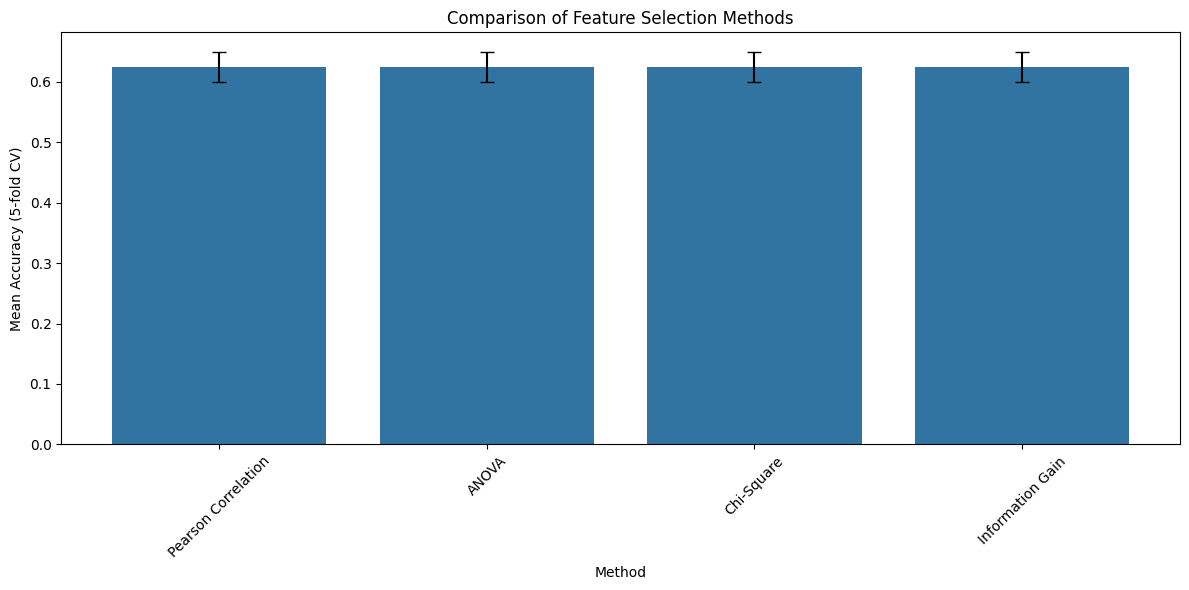


BEST PERFORMING METHOD
Method: Pearson Correlation
Mean Accuracy: 0.6248
Standard Deviation: 0.0245
Number of Features: 8

Top Features from Best Method:
     Feature  Importance
7   diabetes    0.369303
3    insulin    0.258955
2    triceps    0.107272
6        age    0.100215
1  diastolic    0.076650


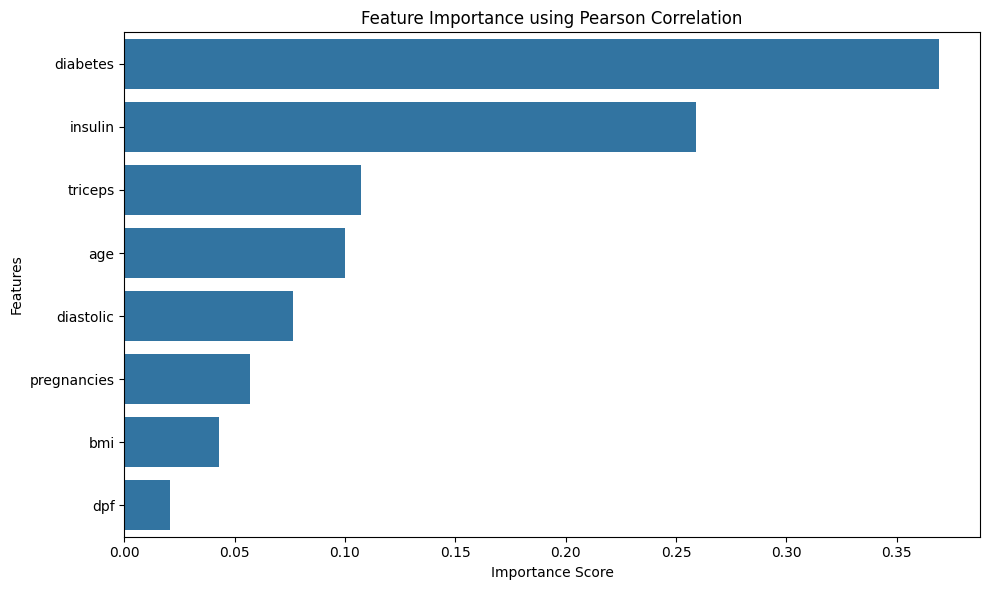


RECOMMENDATION
Based on the comparison, Pearson Correlation is recommended for feature selection
as it achieved the highest mean accuracy of 0.6248
with a standard deviation of 0.0245.
This method identified the most relevant features for predicting glucose levels.


In [ ]:
# Feature Selection Methods Comparison
print("\n" + "="*50)
print("COMPARISON OF FEATURE SELECTION METHODS")
print("="*50)

# Initialize different feature selectors
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Prepare data
X = df.drop(columns=['glucose'])
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])
X_numeric = X.select_dtypes(include=['number'])
X_numeric = X_numeric.abs().astype(int)

# Initialize selectors
selectors = [
    (SelectKBest(score_func=lambda X, y: np.abs(np.corrcoef(X.T, y)[:-1, -1]), k='all'),
     'Pearson Correlation'),
    (SelectKBest(score_func=f_classif, k='all'),
     'ANOVA'),
    (SelectKBest(score_func=chi2, k='all'),
     'Chi-Square'),
    (SelectKBest(score_func=mutual_info_classif, k='all'),
     'Information Gain')
]

# Evaluate each method
results = []
for selector, name in selectors:
    # Apply feature selection and evaluate
    X_selected = selector.fit_transform(X_numeric, y)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(model, X_selected, y, cv=5)

    results.append({
        'Method': name,
        'Mean Accuracy': scores.mean(),
        'Std Accuracy': scores.std(),
        'Num Features': X_selected.shape[1]
    })

# Convert to DataFrame and sort by accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Mean Accuracy', ascending=False)

# Print detailed results
print("\nDetailed Method Comparison:")
print(results_df)

# Visualize results
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='Mean Accuracy', data=results_df)
plt.errorbar(x=range(len(results_df)),
             y=results_df['Mean Accuracy'],
             yerr=results_df['Std Accuracy'],
             fmt='none', color='black', capsize=5)
plt.title('Comparison of Feature Selection Methods')
plt.xlabel('Method')
plt.ylabel('Mean Accuracy (5-fold CV)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print best method details
best_method = results_df.iloc[0]
print("\n" + "="*50)
print("BEST PERFORMING METHOD")
print("="*50)
print(f"Method: {best_method['Method']}")
print(f"Mean Accuracy: {best_method['Mean Accuracy']:.4f}")
print(f"Standard Deviation: {best_method['Std Accuracy']:.4f}")
print(f"Number of Features: {best_method['Num Features']}")

# Get feature importance for best method
best_selector = [s for s, n in selectors if n == best_method['Method']][0]
best_selector.fit(X_numeric, y)
feature_importance = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Importance': best_selector.scores_
}).sort_values('Importance', ascending=False)

print("\nTop Features from Best Method:")
print(feature_importance.head())

# Plot feature importance for best method
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title(f'Feature Importance using {best_method["Method"]}')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("RECOMMENDATION")
print("="*50)
print(f"Based on the comparison, {best_method['Method']} is recommended for feature selection")
print(f"as it achieved the highest mean accuracy of {best_method['Mean Accuracy']:.4f}")
print(f"with a standard deviation of {best_method['Std Accuracy']:.4f}.")
print(f"This method identified the most relevant features for predicting glucose levels.")

WRAPPER METHODS:-



Selected Features using Forward Selection:
Index(['insulin', 'bmi', 'dpf', 'age', 'diabetes'], dtype='object')

Forward Selection Accuracy: 0.6349

Forward Selection Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67        63
           1       0.67      0.52      0.59        63

    accuracy                           0.63       126
   macro avg       0.64      0.63      0.63       126
weighted avg       0.64      0.63      0.63       126


Selected Features using Backward Elimination:
Index(['diastolic', 'insulin', 'bmi', 'dpf', 'diabetes'], dtype='object')

Backward Selection Accuracy: 0.6667

Backward Selection Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        63
           1       0.72      0.54      0.62        63

    accuracy                           0.67       126
   macro avg       0.68      0.67      0.66       126
weighted a

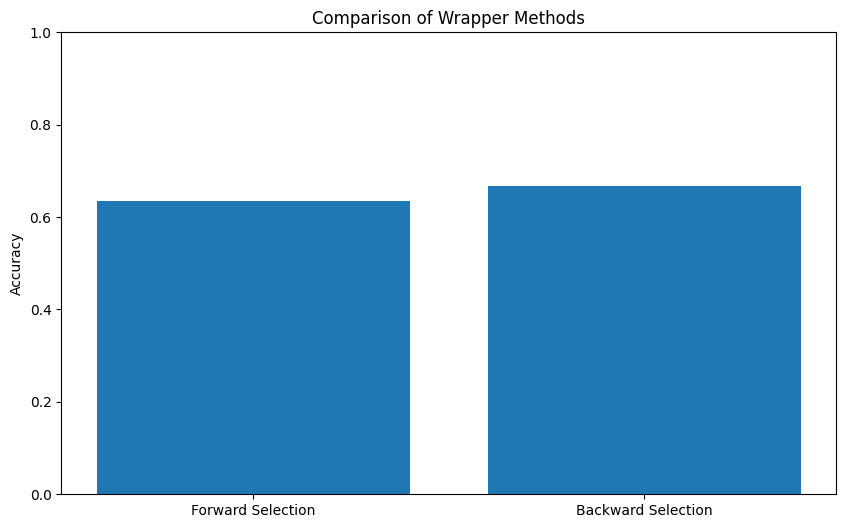

In [ ]:
#feature selection wrapping methods
#forward and backward
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Prepare Data
X = df.drop(columns=['glucose'])  # Features
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])  # Target variable

X_numeric = X.select_dtypes(include=['number'])  #  numeric features
X_numeric = X_numeric.abs().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

#  Forward Feature Selection
forward_selector = SequentialFeatureSelector(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=5,
    direction='forward'
)

# Fit and transform training data
X_train_forward = forward_selector.fit_transform(X_train, y_train)
X_test_forward = forward_selector.transform(X_test)

# Get selected features
selected_features_forward = X_numeric.columns[forward_selector.get_support()]
print("\nSelected Features using Forward Selection:")
print(selected_features_forward)

# Evaluate Forward Selection
rf_forward = RandomForestClassifier(n_estimators=100, random_state=42)
rf_forward.fit(X_train_forward, y_train)
y_pred_forward = rf_forward.predict(X_test_forward)
accuracy_forward = accuracy_score(y_test, y_pred_forward)
print(f"\nForward Selection Accuracy: {accuracy_forward:.4f}")
print("\nForward Selection Classification Report:")
print(classification_report(y_test, y_pred_forward))

# Backward Feature Elimination
backward_selector = SequentialFeatureSelector(
    estimator=RandomForestClassifier(n_estimators=100, random_state=42),
    n_features_to_select=5,  # Number of features to select
    direction='backward'
)

# Fit and transform training data
X_train_backward = backward_selector.fit_transform(X_train, y_train)
X_test_backward = backward_selector.transform(X_test)

# Get selected features
selected_features_backward = X_numeric.columns[backward_selector.get_support()]
print("\nSelected Features using Backward Elimination:")
print(selected_features_backward)

# Evaluate Backward Selection
rf_backward = RandomForestClassifier(n_estimators=100, random_state=42)
rf_backward.fit(X_train_backward, y_train)
y_pred_backward = rf_backward.predict(X_test_backward)
accuracy_backward = accuracy_score(y_test, y_pred_backward)
print(f"\nBackward Selection Accuracy: {accuracy_backward:.4f}")
print("\nBackward Selection Classification Report:")
print(classification_report(y_test, y_pred_backward))

# Compare results
print("\n" + "="*50)
print("WRAPPER METHODS COMPARISON")
print("="*50)
print(f"Forward Selection Accuracy: {accuracy_forward:.4f}")
print(f"Backward Selection Accuracy: {accuracy_backward:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
methods = ['Forward Selection', 'Backward Selection']
accuracies = [accuracy_forward, accuracy_backward]
plt.bar(methods, accuracies)
plt.title('Comparison of Wrapper Methods')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


RECURSIVE FEATURE ELIMINATION (RFE)

Selected Features using RFE:
['pregnancies', 'insulin', 'dpf', 'age', 'diabetes']

RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION (RFECV)

Optimal Number of Features using RFECV: 2

Selected Features using RFECV:
['insulin', 'diabetes']


<ipython-input-27-3ae82bc771af>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_ranking, x='Ranking', y='Feature', palette='viridis')


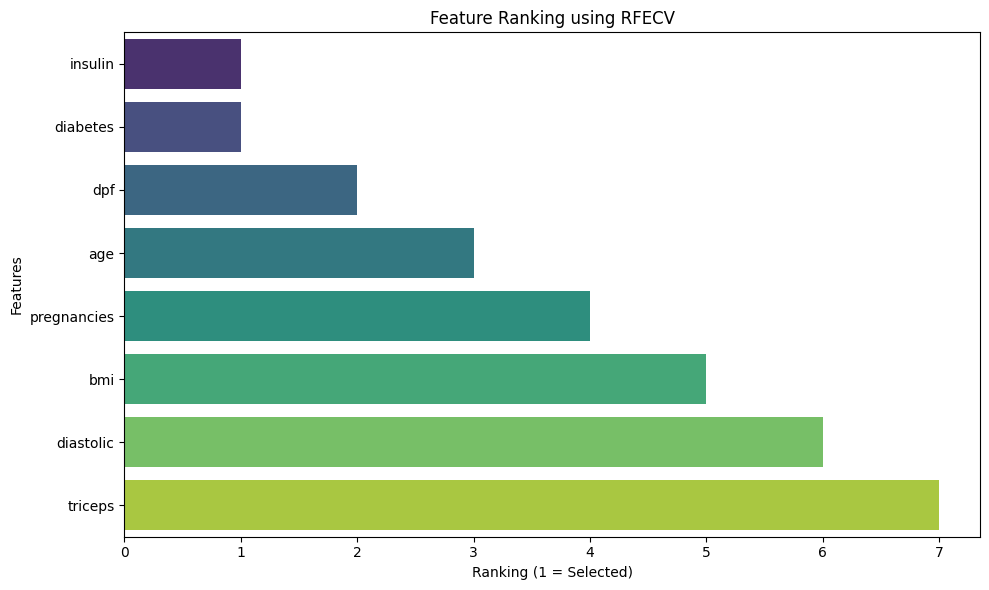

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

<Figure size 1000x600 with 0 Axes>

In [ ]:
#rfe and rfe cv
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare Data
X = df.drop(columns=['glucose'])  # Features
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])  # Target variable

X_numeric = X.select_dtypes(include=['number'])  # numeric features
X_numeric = X_numeric.abs().astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Initialize Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFE
print("\n" + "="*50)
print("RECURSIVE FEATURE ELIMINATION (RFE)")
print("="*50)

rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe = rfe.fit(X_train, y_train)

# Get selected features from RFE
selected_features_rfe = X_numeric.columns[rfe.support_].tolist()
print("\nSelected Features using RFE:")
print(selected_features_rfe)

# RFECV
print("\n" + "="*50)
print("RECURSIVE FEATURE ELIMINATION WITH CROSS-VALIDATION (RFECV)")
print("="*50)

rfecv = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

# Get selected features from RFECV
selected_features_rfecv = X_numeric.columns[rfecv.support_].tolist()
print(f"\nOptimal Number of Features using RFECV: {rfecv.n_features_}")
print("\nSelected Features using RFECV:")
print(selected_features_rfecv)

# Create feature ranking DataFrame
feature_ranking = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Ranking': rfecv.ranking_
}).sort_values('Ranking')

# Plot feature ranking
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_ranking, x='Ranking', y='Feature', palette='viridis')
plt.title('Feature Ranking using RFECV')
plt.xlabel('Ranking (1 = Selected)')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Plot number of features vs cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel('Number of Features')
plt.ylabel('Cross-validation Score')
plt.title('RFECV - Number of Features vs CV Score')
plt.tight_layout()
plt.show()

# Evaluate RFE performance
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
rf_model.fit(X_train_rfe, y_train)
rfe_score = rf_model.score(X_test_rfe, y_test)
print(f"\nRFE Model Accuracy: {rfe_score:.4f}")

# Evaluate RFECV performance
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)
rf_model.fit(X_train_rfecv, y_train)
rfecv_score = rf_model.score(X_test_rfecv, y_test)
print(f"RFECV Model Accuracy: {rfecv_score:.4f}")

experment 11 EMBEDED METHODS :-

In [ ]:
# Embedded Methods - Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

# Prepare Data
X = df.drop(columns=['glucose'])  # Features
y = pd.qcut(df['glucose'], q=2, labels=[0, 1])  # Target variable
X_numeric = X.select_dtypes(include=['number'])
X_numeric = X_numeric.abs().astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)


LASSO FEATURE SELECTION

Selected Features using Lasso:
Index(['diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes'], dtype='object')


<ipython-input-29-4d5fc7ccf6f6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.abs(lasso.coef_), y=X_numeric.columns, palette='viridis')


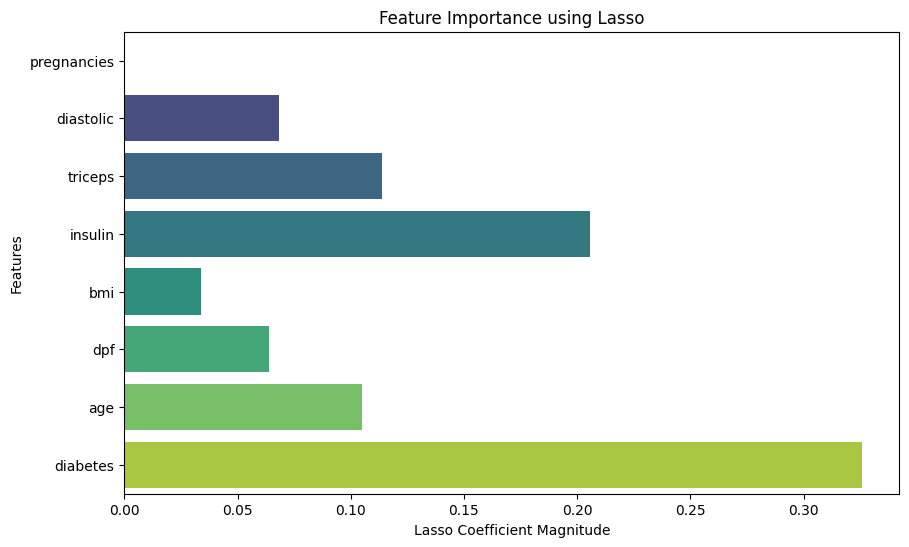

In [ ]:
# 1. Lasso Feature Selection
print("\n" + "="*50)
print("LASSO FEATURE SELECTION")
print("="*50)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Get selected features
selected_features_lasso = X_numeric.columns[lasso.coef_ != 0]
print("\nSelected Features using Lasso:")
print(selected_features_lasso)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=np.abs(lasso.coef_), y=X_numeric.columns, palette='viridis')
plt.xlabel("Lasso Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance using Lasso")
plt.show()


RIDGE REGRESSION FEATURE SELECTION

Selected Features:
Index(['diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes'], dtype='object')

Ridge Regression Accuracy: 0.6825

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        63
           1       0.70      0.63      0.67        63

    accuracy                           0.68       126
   macro avg       0.68      0.68      0.68       126
weighted avg       0.68      0.68      0.68       126



<ipython-input-30-3c03ef0911fd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.abs(ridge.coef_), y=X_numeric.columns, palette='viridis')


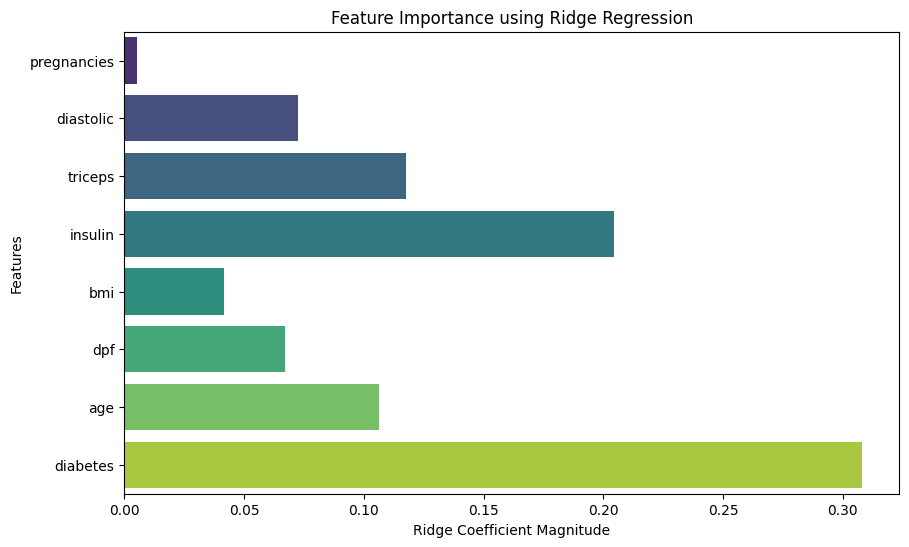

In [ ]:
# 2. Ridge Regression Feature Selection
print("\n" + "="*50)
print("RIDGE REGRESSION FEATURE SELECTION")
print("="*50)

ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

# Get selected features
selected_features_ridge = X_numeric.columns[np.abs(ridge.coef_) > 0.01]
print("\nSelected Features:")
print(selected_features_ridge)

# Make predictions and evaluate
y_pred_ridge = (ridge.predict(X_test) > 0.5).astype(int)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"\nRidge Regression Accuracy: {accuracy_ridge:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ridge))

# Plot Ridge Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=np.abs(ridge.coef_), y=X_numeric.columns, palette='viridis')
plt.xlabel("Ridge Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance using Ridge Regression")
plt.show()


ELASTIC NET FEATURE SELECTION

Selected Features:
Index(['diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes'], dtype='object')

Elastic Net Accuracy: 0.6825

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        63
           1       0.70      0.63      0.67        63

    accuracy                           0.68       126
   macro avg       0.68      0.68      0.68       126
weighted avg       0.68      0.68      0.68       126



<ipython-input-31-db9f40139654>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.abs(elastic_net.coef_), y=X_numeric.columns, palette='viridis')


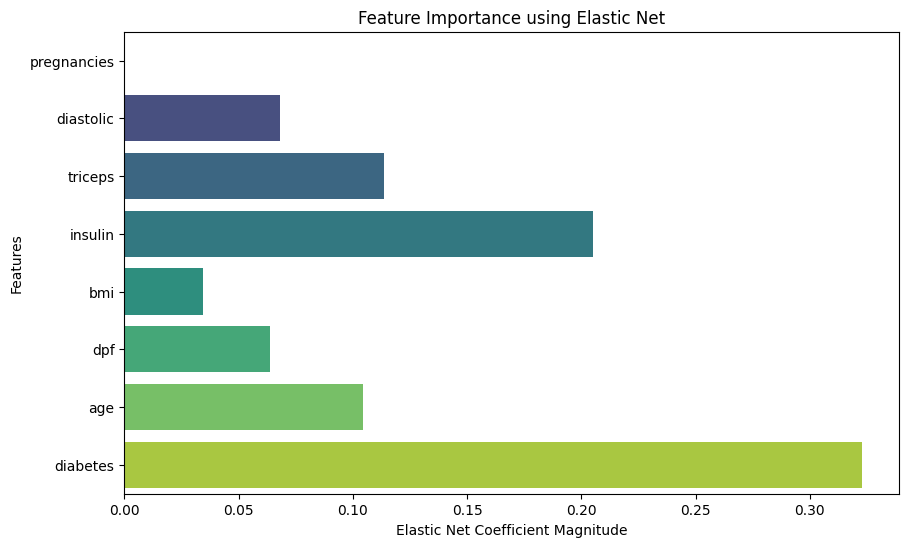

In [ ]:
# 3. Elastic Net Feature Selection
print("\n" + "="*50)
print("ELASTIC NET FEATURE SELECTION")
print("="*50)

elastic_net = ElasticNetCV(cv=5, random_state=42)
elastic_net.fit(X_train, y_train)

# Get selected features
selected_features_elastic = X_numeric.columns[np.abs(elastic_net.coef_) > 0.01]
print("\nSelected Features:")
print(selected_features_elastic)

# Make predictions and evaluate
y_pred_elastic = (elastic_net.predict(X_test) > 0.5).astype(int)
accuracy_elastic = accuracy_score(y_test, y_pred_elastic)
print(f"\nElastic Net Accuracy: {accuracy_elastic:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_elastic))

# Plot Elastic Net Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=np.abs(elastic_net.coef_), y=X_numeric.columns, palette='viridis')
plt.xlabel("Elastic Net Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance using Elastic Net")
plt.show()


RANDOM FOREST FEATURE SELECTION

Feature Importance:
       Feature  Importance
7     diabetes    0.210658
3      insulin    0.151549
5          dpf    0.119254
6          age    0.114496
0  pregnancies    0.112674
4          bmi    0.104431
1    diastolic    0.099354
2      triceps    0.087583

Random Forest Accuracy: 0.6032

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        63
           1       0.61      0.56      0.58        63

    accuracy                           0.60       126
   macro avg       0.60      0.60      0.60       126
weighted avg       0.60      0.60      0.60       126



<ipython-input-32-48f97eea02a6>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')


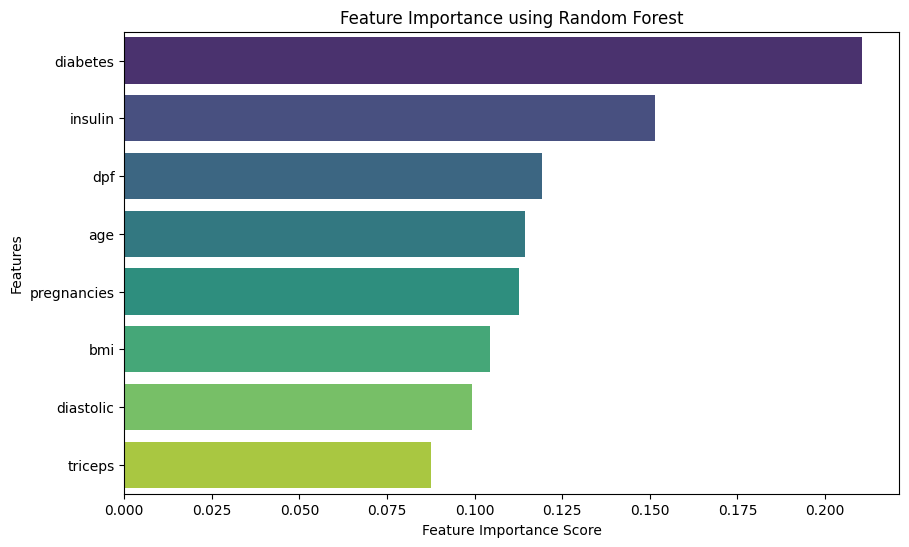

In [ ]:
# 4. Random Forest Feature Selection
print("\n" + "="*50)
print("RANDOM FOREST FEATURE SELECTION")
print("="*50)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_rf)

# Make predictions and evaluate
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.show()


GRADIENT BOOSTING FEATURE SELECTION

Feature Importance:
       Feature  Importance
7     diabetes    0.387065
3      insulin    0.156177
6          age    0.119190
0  pregnancies    0.076322
4          bmi    0.072789
5          dpf    0.066677
2      triceps    0.062945
1    diastolic    0.058835

Gradient Boosting Accuracy: 0.6746

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        63
           1       0.68      0.65      0.67        63

    accuracy                           0.67       126
   macro avg       0.68      0.67      0.67       126
weighted avg       0.68      0.67      0.67       126



<ipython-input-33-d28cbbdd5ab4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_gb, palette='viridis')


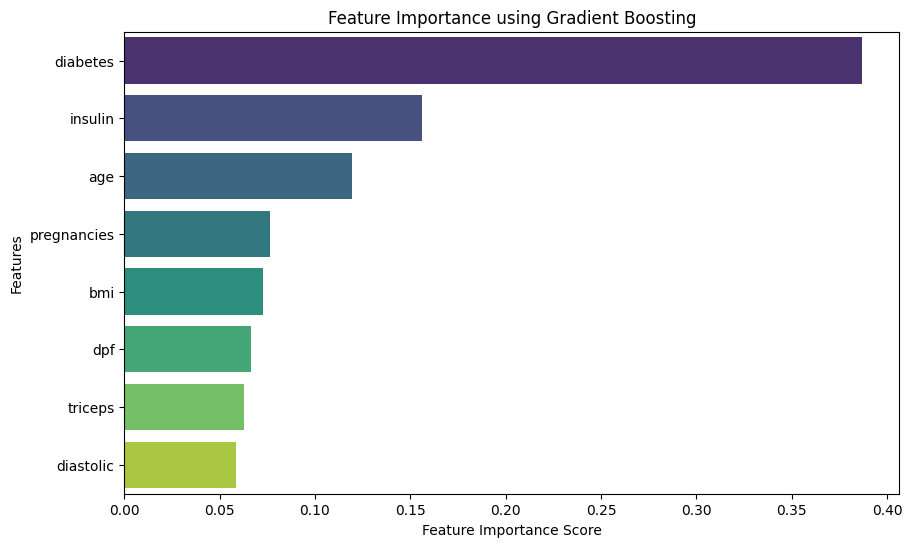

In [ ]:
# 5. Gradient Boosting Feature Selection
print("\n" + "="*50)
print("GRADIENT BOOSTING FEATURE SELECTION")
print("="*50)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Get feature importances
feature_importance_gb = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Importance': gb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_gb)

# Make predictions and evaluate
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nGradient Boosting Accuracy: {accuracy_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# Plot Gradient Boosting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_gb, palette='viridis')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Gradient Boosting")
plt.show()


SUMMARY OF ACCURACIES
Ridge Regression Accuracy: 0.6825
Elastic Net Accuracy: 0.6825
Random Forest Accuracy: 0.6032
Gradient Boosting Accuracy: 0.6746


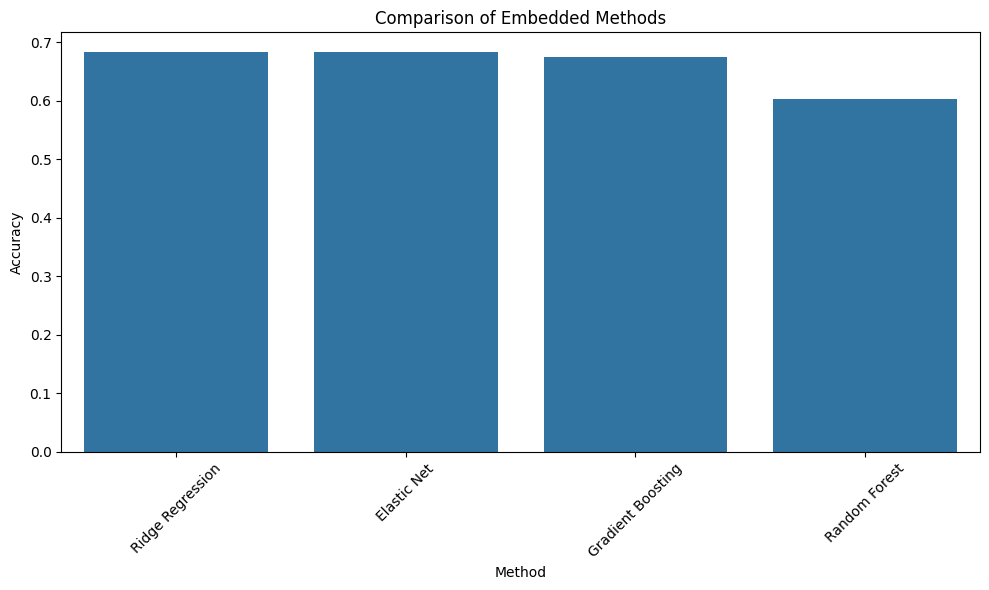


Best Performing Method:
Method: Ridge Regression
Accuracy: 0.6825


In [ ]:
# Summary of All Embedded Methods
print("\n" + "="*50)
print("SUMMARY OF ACCURACIES")
print("="*50)
print(f"Ridge Regression Accuracy: {accuracy_ridge:.4f}")
print(f"Elastic Net Accuracy: {accuracy_elastic:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Method': ['Ridge Regression', 'Elastic Net', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_ridge, accuracy_elastic, accuracy_rf, accuracy_gb]
}).sort_values('Accuracy', ascending=False)

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Accuracy', data=comparison_df)
plt.title('Comparison of Embedded Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print best method
best_method = comparison_df.iloc[0]
print("\nBest Performing Method:")
print(f"Method: {best_method['Method']}")
print(f"Accuracy: {best_method['Accuracy']:.4f}")